In [246]:
import pandas as pd
import numpy as np

In [247]:
import math

In [248]:
from sklearn import linear_model

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
def polynomial_dframe(feature, degree):
    poly_dframe = pd.DataFrame()
    poly_dframe['power_1'] = feature
    for power in range(2, degree + 1):
        name = 'power_' + str(power)
        poly_dframe[name] = feature.astype(np.float64) ** power
        
    return poly_dframe

In [251]:
sales = pd.read_csv('kc_house_data.csv')

In [252]:
sales = sales.sort_values(by=['sqft_living', 'price'])

In [253]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [254]:
poly1_data = polynomial_dframe(sales['sqft_living'], 1)

In [255]:
poly1_data

,power_1
19452,290
15381,370
860,380
18379,384
4868,390
21332,390
8623,410
11500,420
14466,420
465,430


In [256]:
lrModel = linear_model.LinearRegression()

In [257]:
lrModel.fit(poly1_data, sales['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [258]:
(p1_intercept, p1_slope) = (lrModel.intercept_, lrModel.coef_[0])

In [259]:
print ("%s, %s" % (p1_intercept, p1_slope))

-43580.743094474194, 280.62356789744837


####  Produce scatter plot of the training data (just square feet vs price) and add the fitted model.
e.g With matplotlib and dataframes

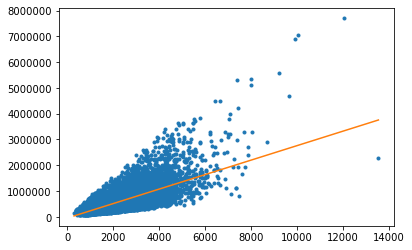

In [260]:
plt.plot(poly1_data['power_1'], sales['price'], '.',
         poly1_data['power_1'], lrModel.predict(poly1_data), '-')

###  2nd degree and 3rd degree polynomial

In [261]:
poly2_data = polynomial_dframe(sales['sqft_living'], 2)

In [262]:
lrModel2 = linear_model.LinearRegression()
lrModel2.fit(poly2_data, sales['price'])

(p2_intercept, p2_slope) = (lrModel2.intercept_, lrModel2.coef_)

Scatter plot

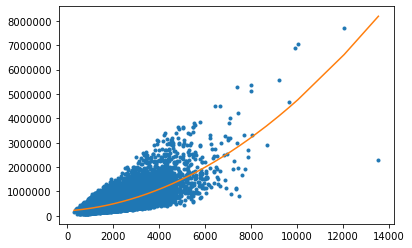

In [263]:
plt.plot(poly2_data['power_1'], sales['price'], '.',
         poly2_data['power_1'], lrModel2.predict(poly2_data), '-')

###  nth degree model and scater plot

In [264]:
def analyze_nth_degree_model(nth_degree, dataset = sales):
    poly_n_data = polynomial_dframe(dataset['sqft_living'], nth_degree)
    lrModel_n = linear_model.LinearRegression()
    lrModel_n.fit(poly_n_data, dataset['price'])
    print ("intercept and coef[] is: %s, %s" % (lrModel_n.intercept_,
                                                lrModel_n.coef_
                                               ))
    
    plt.plot(poly_n_data['power_1'], dataset['price'], '.',
             poly_n_data['power_1'], lrModel_n.predict(poly_n_data), '-'
            )
    return np.concatenate(([lrModel_n.intercept_],lrModel_n.coef_))

intercept and coef[] is: 336819.7482198205, [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]


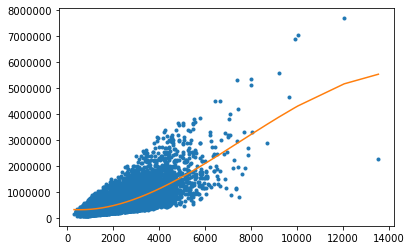

In [265]:
x = analyze_nth_degree_model(3)

intercept and coef[] is: 537116.3296378785, [ 4.56404164e-91 -6.23779017e-50  2.87780943e-56  2.78197725e-88
  1.19863929e-74  2.68553413e-71  2.26147568e-67  1.85900299e-63
  1.47144115e-59  1.09771012e-55  7.43509038e-52  4.23015577e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]


array([ 5.37116330e+05,  4.56404164e-91, -6.23779017e-50,  2.87780943e-56,
        2.78197725e-88,  1.19863929e-74,  2.68553413e-71,  2.26147568e-67,
        1.85900299e-63,  1.47144115e-59,  1.09771012e-55,  7.43509038e-52,
        4.23015577e-48,  1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

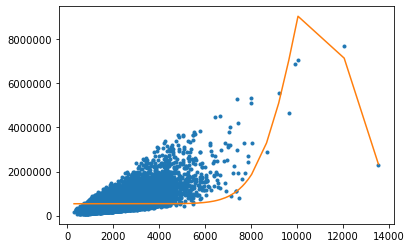

In [266]:
analyze_nth_degree_model(15)

### Create subset of data

In [267]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [268]:
print(len(set_1), len(set_2), len(set_3), len(set_4))

5404 5398 5409 5402


intercept and coef[] is: 539058.8186691445, [ 3.05794168e-90  2.21229707e-49  8.63660731e-55  1.21888907e-88
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]


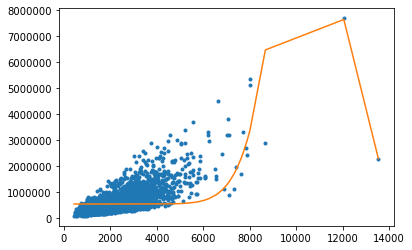

In [269]:
cof_1 = analyze_nth_degree_model(15, set_1)

intercept and coef[] is: 506811.6355769241, [ 2.68007787e-77 -1.28312344e-39 -1.45857231e-44  5.75867742e-50
  1.04404871e-53  1.35479902e-58  3.62867885e-55  1.49807495e-51
  5.73974481e-48  1.95158348e-44  5.37897084e-41  9.38035610e-38
 -3.62478342e-41  4.63968399e-45 -1.96500572e-49]


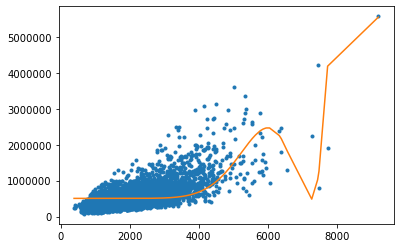

In [270]:
cof_2 = analyze_nth_degree_model(15, set_2)

intercept and coef[] is: 530874.3166533511, [ 2.83751934e-88 -3.80811885e-49 -8.53617144e-55 -3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]


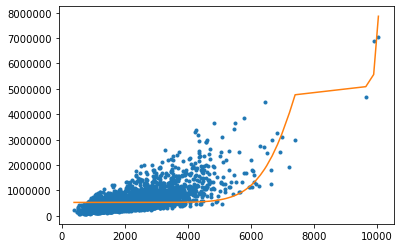

In [271]:
cof_3 = analyze_nth_degree_model(15, set_3)

intercept and coef[] is: 494822.42714188783, [ 1.37062035e-76 -7.34929426e-40 -2.48457909e-44  3.04237765e-49
  4.17619486e-53  1.30559251e-54  1.27051326e-54  4.87799084e-51
  1.73524691e-47  5.46982653e-44  1.39568452e-40  2.25011155e-37
 -9.43820708e-41  1.31553951e-44 -6.09073061e-49]


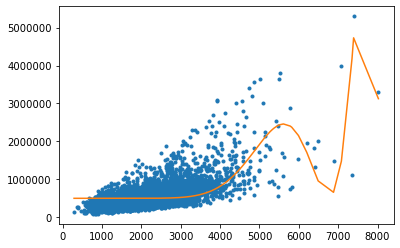

In [272]:
cof_4 = analyze_nth_degree_model(15, set_4)

In [273]:
cof_4

array([ 4.94822427e+05,  1.37062035e-76, -7.34929426e-40, -2.48457909e-44,
        3.04237765e-49,  4.17619486e-53,  1.30559251e-54,  1.27051326e-54,
        4.87799084e-51,  1.73524691e-47,  5.46982653e-44,  1.39568452e-40,
        2.25011155e-37, -9.43820708e-41,  1.31553951e-44, -6.09073061e-49])

### Is the sign for power_15 the same in all four models

In [274]:
print (cof_1[15] > 0, cof_2[15] > 0, cof_3[15] > 0, cof_4[15] > 0)

True False True False


In [275]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv')
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv')
test_data = pd.read_csv('wk3_kc_house_test_data.csv')

In [276]:
print (len(train_data), len(validation_data), len(test_data))

9761 9635 2217


In [277]:
max_degree = 15
min_rss = None

for degree in range(1, max_degree + 1):
    poly_n_feature = polynomial_dframe(train_data['sqft_living'], degree)
    lrModel_n = linear_model.LinearRegression()
    lrModel_n.fit(poly_n_feature, train_data['price'])
    
    # Rss for validation set
    poly_n_feature_validation_set = polynomial_dframe(validation_data['sqft_living'], degree)
    errors = validation_data['price'] - lrModel_n.predict(poly_n_feature_validation_set)
#     errors /= 1.0e3
    rss_valid = np.sum(errors * errors)
    
    if (min_rss == None):
        min_rss = rss_valid
    else:
        min_rss = min(min_rss, rss_valid)
    
    # Rss for test set
    poly_n_feature_test_set = polynomial_dframe(test_data['sqft_living'], degree)
    errors_test = test_data['price'] - lrModel_n.predict(poly_n_feature_test_set)
#     errors_test /= 1.0e3
    rss_test = np.sum(errors_test * errors_test)
    
    print("Degree: %02d -> rss for validation test: %.0f, rss for test set: %.0f, intercept: %s" % 
          (degree, rss_valid, rss_test, lrModel_n.intercept_))

print (min_rss)

Degree: 01 -> rss for validation test: 629097886299586, rss for test set: 142347931358639, intercept: -59493.317165210145
Degree: 02 -> rss for validation test: 623955062706518, rss for test set: 135542039274080, intercept: 267506.28013224225
Degree: 03 -> rss for validation test: 625820280251670, rss for test set: 135585996079047, intercept: 262170.64833935385
Degree: 04 -> rss for validation test: 629987335742088, rss for test set: 135382681360754, intercept: 277368.46421171364
Degree: 05 -> rss for validation test: 628224826758915, rss for test set: 135495084282831, intercept: 266178.78714385524
Degree: 06 -> rss for validation test: 566268533238196, rss for test set: 135225107290004, intercept: 297506.75809082703
Degree: 07 -> rss for validation test: 1073845095217458, rss for test set: 133047310000263, intercept: 344491.5306678772
Degree: 08 -> rss for validation test: 7087776137696669, rss for test set: 134873974595364, intercept: 391486.6078043793
Degree: 09 -> rss for validatio

intercept and coef[] is: 353942.1884553575, [ 6.06213428e-19 -9.92447835e-12  6.90662882e-12  1.22820747e-08
 -3.50008547e-12  3.48088695e-16 -1.15479276e-20]


array([ 3.53942188e+05,  6.06213428e-19, -9.92447835e-12,  6.90662882e-12,
        1.22820747e-08, -3.50008547e-12,  3.48088695e-16, -1.15479276e-20])

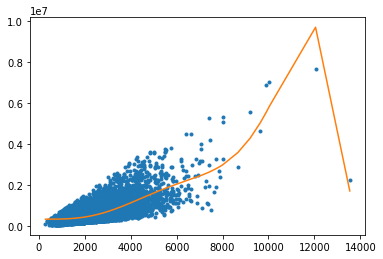

In [278]:
analyze_nth_degree_model(7)